In [1]:
%tensorflow_version 1.x
import tensorflow as tf

from tensorflow import keras
from keras.layers import Flatten, Dense, Dropout
from keras import Model
from keras.applications import MobileNetV2
from keras.datasets import cifar10
from keras import Model, optimizers


import cv2
import sys
import numpy as np
import csv
import math

import matplotlib.pyplot as plt


TensorFlow 1.x selected.


Using TensorFlow backend.


### Import Dataset

In [2]:
# Class names for different classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# Load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print ('Training data seize:', train_images.shape, 'Test data size', test_images.shape)

# Normalize pixel values between -1 and 1
train_images = train_images / 127.5 - 1 
test_images = test_images / 127.5 - 1 

Training data seize: (50000, 32, 32, 3) Test data size (10000, 32, 32, 3)


### Visualize dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

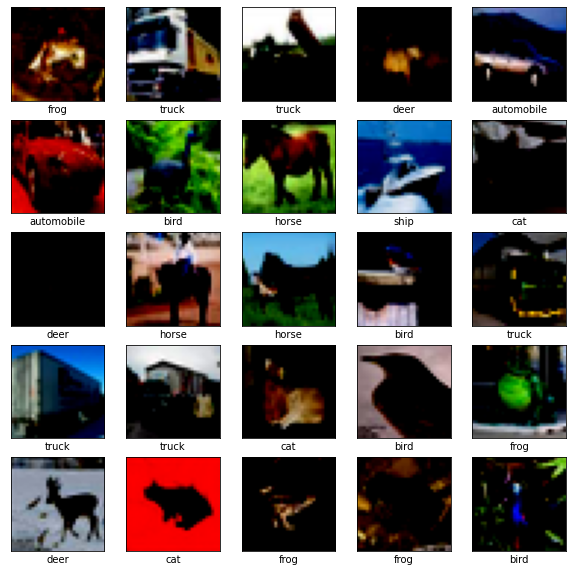

In [3]:
%matplotlib inline
#Show first 25 training images below
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

### Resize images for use with MobileNetV2

In [4]:
# Upsize all training and testing images to 96x96 for use with mobile net
import numpy as np
import cv2
minSize = 96 
#minimum size requried for mobileNetV2
# You may use cv2 package. Look for function:
#"cv2.resize(<originalImage>, dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)"
# resize train image: You can first initialize a numpy array resized_train_images to store all the resized training images
resized_train_images = np.zeros((50000, minSize, minSize, 3), dtype=np.float32)
# <Write code for resizing>m

for i in range(len(resized_train_images)):
  resized_train_images[i]  = cv2.resize(train_images[i], dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)
 
# resize test image: You can first initialize a numpy array resized_test_images to store all the resized test images
resized_test_images = np.zeros((10000, minSize, minSize, 3), dtype=np.float32)

# <Write code for resizing>

for i in range(len(resized_test_images)):
  resized_test_images[i] = cv2.resize(test_images[i], dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)


### Download MobileNetV2 model



Removing final outut layer by changing parameter include_top = False

In [5]:
#PART A
import tensorflow as tf
model = MobileNetV2(
    input_shape=(minSize, minSize, 3),
    include_top=False,
    weights="imagenet"

)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
type(model)

keras.engine.training.Model

### Add custom layers at the end of downloaded model

In [7]:
#<Write code for adding custom layers>

cnn = model.output
cnn = Flatten()(cnn)
#hidden layer
cnn = Dense(1024, activation = 'sigmoid')(cnn)
cnn = Dropout(0.1)(cnn) 
#output layer
cnn = Dense(10, activation = 'softmax')(cnn)

model = Model(inputs=model.input, outputs=cnn)


### Add loss function, compile and train the model, and check accuracy on test data

In [8]:
#<Write code>
model.compile(optimizer=optimizers.Adam(lr=0.01,epsilon =1),loss ='sparse_categorical_crossentropy',metrics=['accuracy'])


In [9]:
resized_train_images.shape
train_labels.shape

(50000, 1)

### Extra code for producing different plots

In [10]:
epochs = 5
batch_size = 32
model.fit(resized_train_images,train_labels,batch_size = batch_size, epochs=epochs)


Epoch 1/5
50000/50000 [==============================] - 113s 2ms/step - loss: 0.5807 - accuracy: 0.8134
Epoch 2/5
50000/50000 [==============================] - 105s 2ms/step - loss: 0.2350 - accuracy: 0.9199
Epoch 3/5
50000/50000 [==============================] - 104s 2ms/step - loss: 0.1445 - accuracy: 0.9509
Epoch 4/5
50000/50000 [==============================] - 103s 2ms/step - loss: 0.0934 - accuracy: 0.9682
Epoch 5/5
50000/50000 [==============================] - 103s 2ms/step - loss: 0.0663 - accuracy: 0.9773


In [11]:
test_loss,test_acc = model.evaluate(resized_test_images,test_labels)
print('Test loss: ', test_loss)
print('Test accuracy:', test_acc)


10000/10000 [==============================] - 5s 471us/step
Test loss:  0.2472286021977663
Test accuracy: 0.9223999977111816


In [16]:
loss = [0.5807,0.2350,0.1445,0.0934,0.0663]
epoch_num = [1,2,3,4,5]

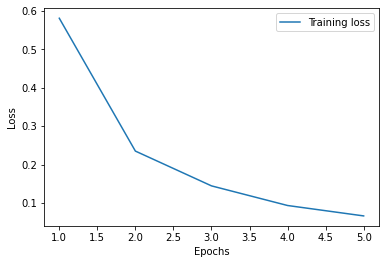

In [17]:
import matplotlib.pyplot as plt
history = model
epochs = range(1,15)
plt.plot(epoch_num, loss, label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()